https://www.kaggle.com/datasets/sadikaljarif/bangla-and-english-fake-news-dataset/data

# imports and modifying data

In [78]:
# install moules andlibraries
# pip install dtreeviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.sparse import hstack

In [79]:
#upload dataset
df = pd.read_csv("fake_news.csv")

In [80]:
# we have a nig dataset which contains 10 000 rows
df.describe()

,lebel
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [81]:
# check duplicates
df.duplicated().sum()

270

In [82]:
# delete duplicates
df = df.drop_duplicates()

In [83]:
# check nan values
df.isnull().sum()

title    0
text     0
lebel    0
dtype: int64

In [84]:
# rename the column
# due to the spli in the name
df = df.rename(columns={'lebel': 'label'})

In [85]:
# check our data
df

,title,text,label
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1
...,...,...,...
9995,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,"In the real world, if your boss is damaging yo...",0
9996,Republican tax fight complicates plan to pass ...,WASHINGTON (Reuters) - A budget plan crucial t...,1
9997,Nigeria offers to meet militants after ceasefi...,ABUJA (Reuters) - The minister for Nigeria s o...,1
9998,Mike Pence: Trump Is Probably Going To Tortur...,"On Face The Nation, Mike Pence showed exactly ...",0


# Checking balance

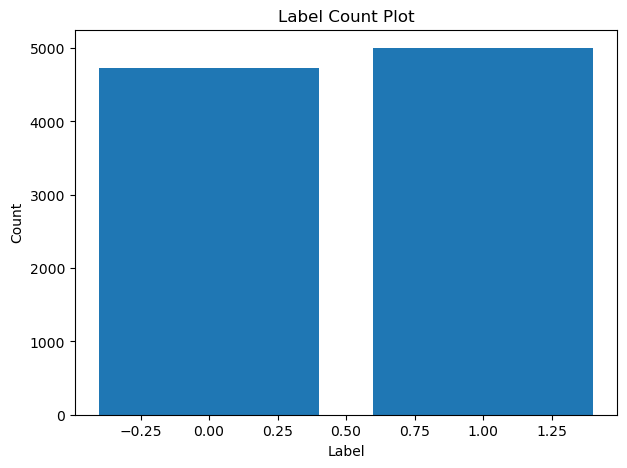

In [86]:
# Count the occurrences of each label (assuming 'label' is the column containing labels)
sentiment_counts = df['label'].value_counts()

# create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(7, 5))

# ploting a bar chart with the counts of each label
ax.bar(sentiment_counts.index, sentiment_counts.values)

# customize the plot: set labels for x-axis and y-axis, and add a title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Label Count Plot')

# show the plot
plt.show()

# resource for the same structure of a plot: https://www.kaggle.com/code/sihabhossan/bangla-fake-news-detection

# SVC model

In [87]:
# splitting data into train-test
labels = df['label']
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

# source of SVC model: 
# https://medium.com/geekculture/detecting-fake-news-using-supervised-learning-8abf09b9bf1d

In [88]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_train)

In [89]:
# creating SVC model
model = LinearSVC()

# tfidf_train is a sparse matrix obtained from TF-IDF vectorization 
# of the training text data (x_train). Each row of this matrix represents 
# a document (text), and each column represents a unique word or term 
# from the entire corpus of documents

# y_train represents the target or labels corresponding 
# to the training data. y_train contains the labels (0 or 1) 
# indicating the class of each document in the training set
model.fit(tfidf_train, y_train)

LinearSVC()

In [90]:
# TF-IDF vectorization on the test data
tfidf_test = tfidf_vectorizer.transform(x_test)

# checking accuracy score of the model
y_pred_SVM = model.predict(tfidf_test)
score = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy: {round(score * 100, 2)}%')

# I am surprised wit the accuracy

Accuracy: 98.72%


# Decision Tree Classifier

In [91]:
# creating Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0)

# tfidf_train is a sparse matrix obtained from TF-IDF vectorization 
# of the training text data (x_train). Each row of this matrix represents 
# a document (text), and each column represents a unique word or term 
# from the entire corpus of documents

# y_train represents the target or labels corresponding 
# to the training data. y_train contains the labels (0 or 1) 
# indicating the class of each document in the training set
model.fit(tfidf_train, y_train)
# the same source of Decision tree model: 
# https://medium.com/geekculture/detecting-fake-news-using-supervised-learning-8abf09b9bf1d

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [92]:
# checking accuracy score of the model
y_pred_DT = model.predict(tfidf_test)
score = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {round(score * 100, 2)}%')

# almost the perfect model

Accuracy: 99.13%


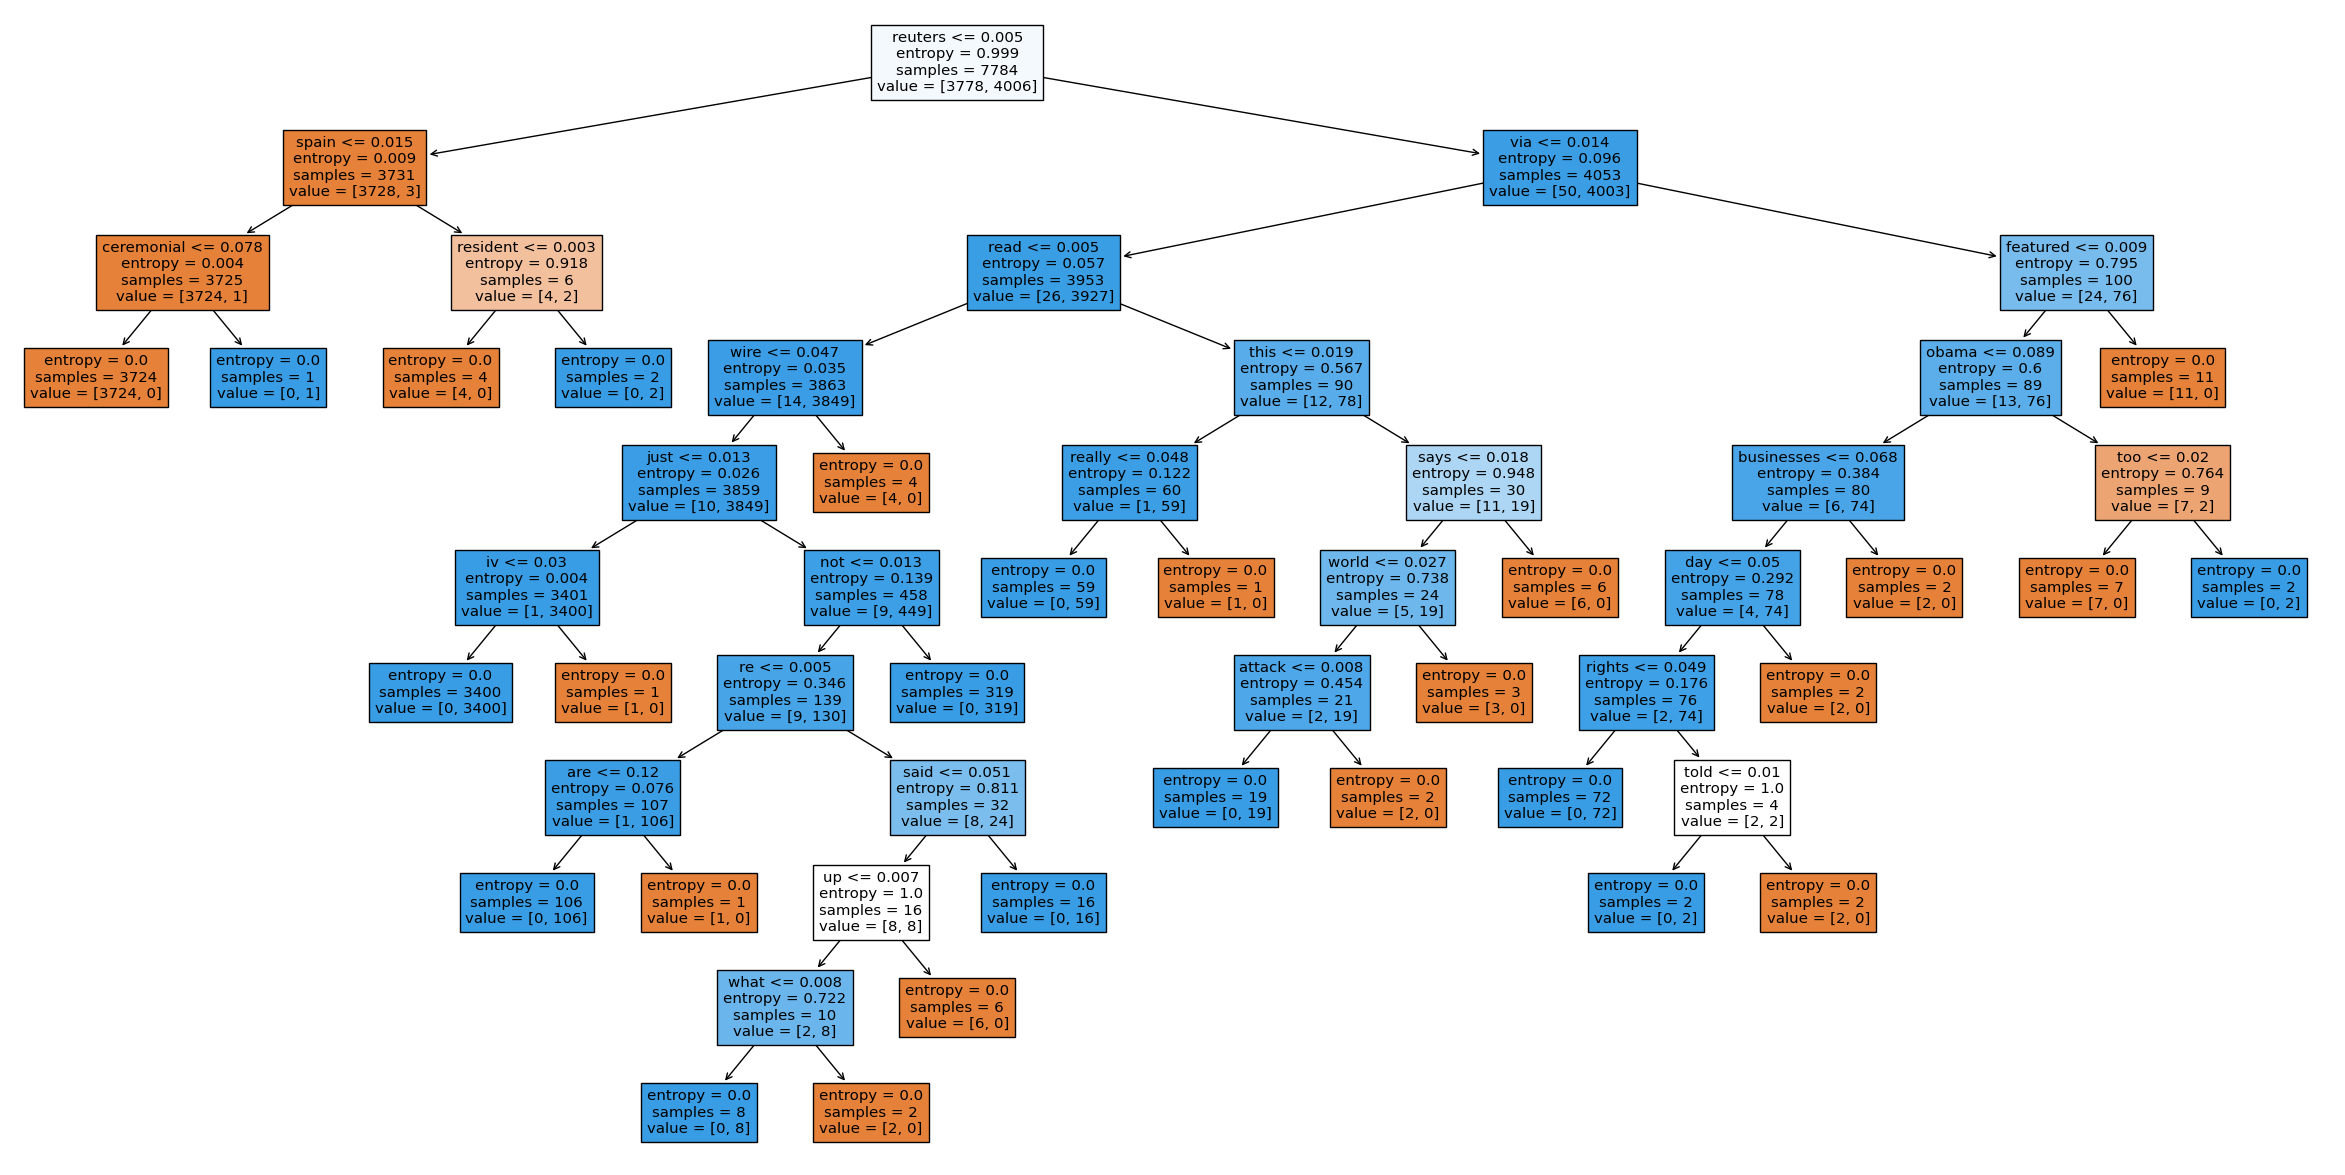

In [93]:
from sklearn.tree import plot_tree

# creating a plot
plt.figure(figsize=(30,15))
plot_tree(model, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out())
plt.savefig('decision_tree_plot.png')  # saving the plot to the same folder
plt.show() # show the plot

# we can read root nodes of the decision tree

# Reuters is a global news organization that provides news, financial information, and analytics
# probably, many fake news refer to this website providing with false info

# Getty Images is a well-known American photo agency providing high-quality stock images, illustrations, and videos. 
# it might be that in fake news this agency is mentioned as an author of visual content

# passed, created, read, reported - are also common words in fake messages
# maybe it refers to some actions that can arise worriness in readers

# A tester row

In [94]:
# have a sample of fake news
text_of_row_1 = df.loc[1, 'text']
print(text_of_row_1)

WASHINGTON (Reuters) - President Donald Trump’s call for $1.5 billion this year to help build a wall along the border with Mexico could be in jeopardy as fellow Republicans in Congress weigh delaying a decision on the request. Republican Senator Roy Blunt, a member of his party’s leadership, told reporters on Tuesday that money for the wall likely would not be coupled with a spending bill that must pass by April 28 to avoid shutting down federal agencies whose funding expires then. Blunt said the must-do funding “comes together better” without Trump’s additional request for the border wall and military programs and could be considered “at a later time.” Democrats are threatening to block the bill funding federal agencies from April 29 to Sept. 30, the end of the current fiscal year, if money for the border wall is included. They object to one of Trump’s premier 2016 campaign promises, saying it is poorly planned and that there are other border security measures already constructed or u

In [102]:
# input data for testing
tester_row = {
    'title': "WASHINGTON (Reuters)", 
    'text': "President Donald Trump’s call for $1.5 billion this year to help build a wall along the border with Mexico could be in jeopardy as fellow Republicans in Congress weigh delaying a decision on the request. Republican Senator Roy Blunt, a member of his party’s leadership", 
}

# the variable is created to hold these 
# input elements separately
# becuase the tester row is a dictionary
text_documents = [tester_row['title'], tester_row['text']]

# preprocess the text data in the 'title' and 'text' columns
# using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
# fit the vectorizer on the training data
tfidf_vectorizer.fit(x_train)
# transform the test data
vectorized_documents = tfidf_vectorizer.transform(text_documents)

# make predictions using the trained model
predicted_probabilities = model.predict_proba(vectorized_documents)

# display the predicted probabilities for each class
print("Predicted Probabilities by Category:")
print(predicted_probabilities)

# define a dictionary to map class labels to their interpretations
label_interpretation = {
    1: "It is a fake news",
    0: "It is a true news"
}

# determine the predicted label based on the highest probability
predicted_label_index = np.argmax(predicted_probabilities)
predicted_label = label_interpretation[predicted_label_index]
print("\nResults:", predicted_label)

Predicted Probabilities by Category:
[[0. 1.]
 [1. 0.]]

Results: It is a fake news


In [104]:
# input data for testing
tester_row = {
    'title': "Helsinki", 
    'text': "cow cat dog true er of his party’s leadership", 
}

# the variable is created to hold these 
# input elements separately
# becuase the tester row is a dictionary
text_documents = [tester_row['title'], tester_row['text']]

# preprocess the text data in the 'title' and 'text' columns
# using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
# fit the vectorizer on the training data
tfidf_vectorizer.fit(x_train)
# transform the test data
vectorized_documents = tfidf_vectorizer.transform(text_documents)

# make predictions using the trained model
predicted_probabilities = model.predict_proba(vectorized_documents)

# display the predicted probabilities for each class
print("Predicted Probabilities by Category:")
print(predicted_probabilities)

# define a dictionary to map class labels to their interpretations
label_interpretation = {
    1: "It is a fake news",
    0: "It is a true news"
}

# determine the predicted label based on the highest probability
predicted_label_index = np.argmax(predicted_probabilities)
predicted_label = label_interpretation[predicted_label_index]
print("\nResults:", predicted_label)

Predicted Probabilities by Category:
[[1. 0.]
 [1. 0.]]

Results: It is a true news


In [105]:
from joblib import dump, load
dump(model, 'model.joblib') 

['model.joblib']